In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Preprocessing

In [ ]:
# ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def generate_data(DIR):
    datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip = True)
    
    generator = datagen.flow_from_directory(DIR,
                                            batch_size=64,
                                            shuffle=True,
                                            target_size=(224, 224),
                                            class_mode='sparse')
    return generator

training_dir = '/content/gdrive/My Drive/Colab Notebooks/Dataset/ImageJeruk/train/'
validation_dir = '/content/gdrive/My Drive/Colab Notebooks/Dataset/ImageJeruk/validation/'

train_generator = generate_data(training_dir)
validation_generator = generate_data(validation_dir)

train_generator.class_indices

Found 200 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


{'Masak': 0, 'Mentah': 1}

## Modelling

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a sequential model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layerslayers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['acc'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('vgg16_best.h5', monitor='acc', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_acc", mode="min",restore_best_weights=True, patience=5)

callbacks_list = [checkpoint,early]

history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=20, 
    shuffle=True, 
    verbose=True,
    callbacks=callbacks_list)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 0.9968 - acc: 0.5100
Epoch 1: acc improved from -inf to 0.51000, saving model to vgg16_best.h5
4/4 [==============================] - 137s 22s/step - loss: 0.9968 - acc: 0.5100 - val_loss: 0.7197 - val_acc: 0.5000
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.7369 - acc: 0.5000
Epoch 2: acc did not improve from 0.51000
4/4 [==============================] - 39s 9s/step - loss: 0.7369 - acc: 0.5000 - val_loss: 0.7036 - val_acc: 0.5000
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 0.6951 - acc: 0.5100 
Epoch 3: acc did not improve from 0.51000
4/4 [==============================] - 37s 12s/step - loss: 0.6951 - acc: 0.5100 - val_loss: 0.6969 - val_acc: 0.5000
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.9005 - acc: 0.5200 
Epoch 4: acc improved from 0.51000 to 0.52000, saving model to vgg16_best.h5
4/4 [==============================] - 49s 16s/step - loss: 0

## Evaluation

In [ ]:
# Evaluate the model on the test data and print the accuracy
scores = model.evaluate(validation_generator)
print("Accuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 2s 2s/step - loss: 0.7198 - acc: 0.5000
Accuracy: 50.00%


## Testing

Saving 1.jpg to 1.jpg


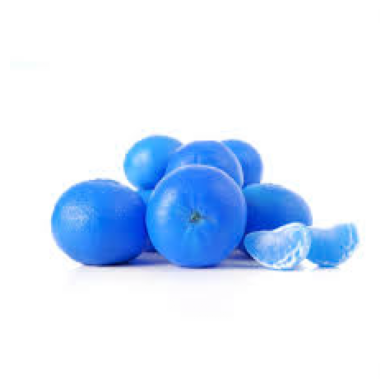

1/1 [==============================] - 1s 860ms/step
Gambar 1.jpg diklasifikasikan sebagai: Masak


In [ ]:
# Impor library yang diperlukan
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Definisikan fungsi untuk memuat model
def load_model():
    # Muat model
    model = tf.keras.models.load_model('vgg16_best.h5')
    # Kompilasi model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    # Kembalikan model
    return model

# Definisikan fungsi untuk memproses gambar
def process_image(image):
    # Ubah ukuran gambar menjadi 224x224 piksel
    img = cv2.resize(image, (224, 224))
    # Ubah warna gambar dari BGR ke RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Ubah tipe data gambar menjadi float32
    img = img.astype(np.float32)
    # Normalisasi nilai piksel gambar agar berada dalam rentang [0, 1]
    img /= 255.0
    # Tambahkan dimensi batch ke gambar
    img = np.expand_dims(img, axis=0)
   # Kembalikan gambar yang telah diproses
    return img

# Definisikan fungsi untuk memprediksi kelas gambar
def predict_class(model, image):
    # Memproses gambar
    img = process_image(image)
    # Lakukan prediksi kelas gambar
    pred = model.predict(img)
    # Ambil indeks kelas dengan probabilitas tertinggi
    idx = np.argmax(pred)
    # Kembalikan kelas
    if idx == 0:
        return 'Masak'
    else:
        return 'Mentah'

# Muat model
model = load_model()

# Uji gambar
uploaded = files.upload()
for filename in uploaded.keys():
    # Baca gambar
    img = cv2.imread(filename)
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    plt.axis('off')
    plt.show()
    # Prediksi kelas gambar
    predicted_class = predict_class(model, img)
    # Tampilkan hasil prediksi
    print('Gambar', filename, 'diklasifikasikan sebagai:', predicted_class)